**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost
from sklearn.model_selection import KFold
import time
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier

**BINARY CLASS KAGGLE DATA**

In [ ]:
b1dataframe = pd.read_csv("Kaggle_Binary.csv")
array = b1dataframe.values
Xb1 = array[:,0:20]
Yb1 = array[:,20]

In [ ]:
Xb1_train, Xb1_test, Yb1_train, Yb1_test = train_test_split(Xb1, Yb1, test_size=0.2, random_state=0)

PCA

In [ ]:
sc = StandardScaler()
Xbp_train = sc.fit_transform(Xb1_train)
Xbp_test = sc.transform(Xb1_test)

In [ ]:
pca = PCA(n_components = 2)

Xbp_train = pca.fit_transform(Xbp_train)
Xbp_test = pca.transform(Xbp_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
pca_classifier = LogisticRegression(random_state = 0)
pca_classifier.fit(Xbp_train, Yb1_train)

LogisticRegression(random_state=0)

In [ ]:
Ybp_pred = pca_classifier.predict(Xbp_test)
print("PCA-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybp_pred))

PCA-Accuracy-Kaggle-Binary:  0.884375


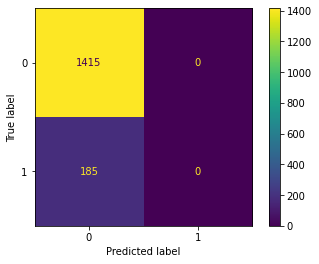

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybp_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

HCA

In [ ]:
data_scaled = normalize(b1dataframe)
data_scaled = pd.DataFrame(data_scaled, columns=b1dataframe.columns)

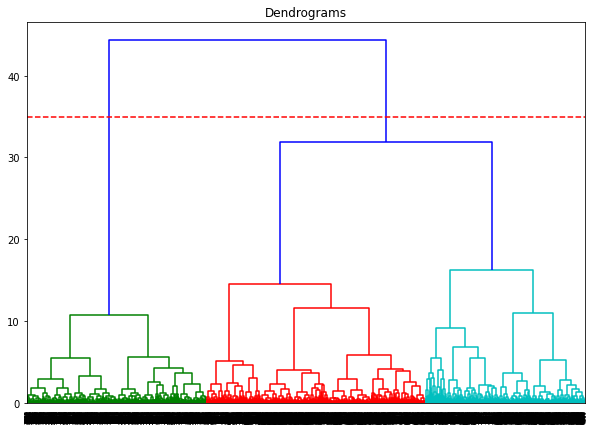

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=35, color='r', linestyle='--')

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
Ybh_pred = cluster.fit_predict(data_scaled)
print("HCA-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1, Ybh_pred))

HCA-Accuracy-Kaggle-Binary:  0.6666666666666666


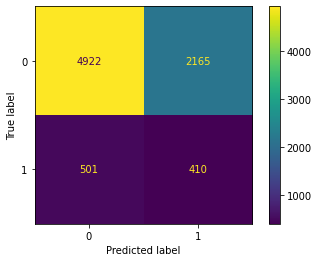

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1, Ybh_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

LDA

In [ ]:
Xb1l = sc.fit_transform(Xb1)

In [ ]:
lda = LDA(n_components=1)
lda.fit_transform(Xb1l, Yb1)

array([[2.27122088],
       [0.73134909],
       [1.80156667],
       ...,
       [0.13204162],
       [1.86651822],
       [0.05506811]])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, Xb1l, Yb1, scoring='accuracy', cv=cv, n_jobs=-1)
print("LDA-Accuracy-Kaggle-Binary: ",np.mean(scores))

LDA-Accuracy-Kaggle-Binary:  0.8966824155193992


QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(Xb1, Yb1)

QuadraticDiscriminantAnalysis()

In [ ]:
scores = cross_val_score(qda, Xb1, Yb1, scoring='accuracy', cv=cv, n_jobs=-1)
print("QDA-Accuracy-Kaggle-Binary: ",np.mean(scores))  

QDA-Accuracy-Kaggle-Binary:  0.8783857425949103


BAGGING

In [ ]:
#specifying base classifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
bagging = BaggingClassifier(base_estimator=cart,n_estimators=num_trees, random_state=seed)

In [ ]:
bstart = time.time()
b_bagging_model = bagging.fit(Xb1_train,Yb1_train)
bend = time.time()
# total time taken
print(f"Runtime of the Bagging is {bend - bstart}")

Runtime of the Bagging is 3.910067558288574


In [ ]:
Ybba_pred = b_bagging_model.predict(Xb1_test)
print("BAGGING-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybba_pred))

BAGGING-Accuracy-Kaggle-Binary:  0.963125


In [ ]:
print("Precision-Recall-Fscore[binary] on test data:", precision_recall_fscore_support(Yb1_test, Ybba_pred, average='binary'))

Precision-Recall-Fscore[binary] on test data: (0.8888888888888888, 0.7783783783783784, 0.829971181556196, None)


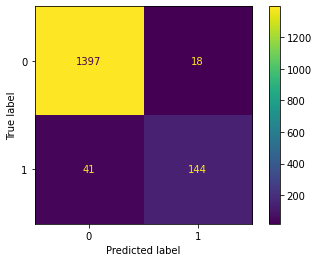

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybba_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

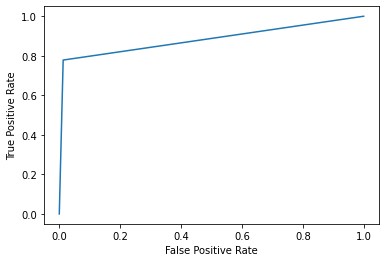

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(Yb1_test, Ybba_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

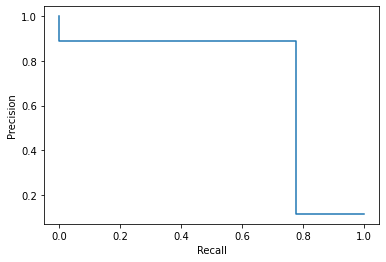

In [ ]:
# Precision Recall Display
prec, recall, _ = precision_recall_curve(Yb1_test, Ybba_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

BOOSTING

In [ ]:
# Defining the Adaboost model
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=0.5)

In [ ]:
bstart = time.time()
b_abc_model = abc.fit(Xb1_train, Yb1_train)
bend = time.time()
# total time taken
print(f"Runtime of the Adaboost is {bend - bstart}")

Runtime of the Adaboost is 0.1984851360321045


In [ ]:
Ybbo_pred = b_abc_model.predict(Xb1_test)
print("BOOSTING-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybbo_pred))

BOOSTING-Accuracy-Kaggle-Binary:  0.8925


In [ ]:
print("Precision-Recall-Fscore[binary] on test data:", precision_recall_fscore_support(Yb1_test, Ybbo_pred, average='binary'))

Precision-Recall-Fscore[binary] on test data: (0.76, 0.10270270270270271, 0.18095238095238098, None)


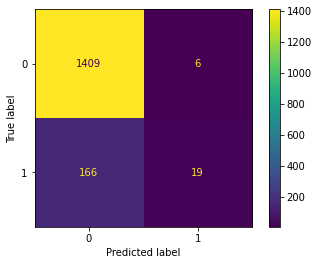

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybbo_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

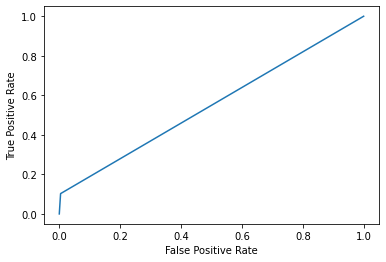

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(Yb1_test, Ybbo_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

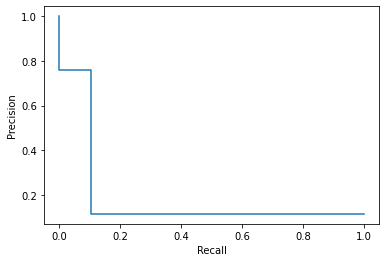

In [ ]:
# Precision Recall Display
prec, recall, _ = precision_recall_curve(Yb1_test, Ybbo_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

STACKING

In [ ]:
# Specifying base classifiers
qda = QuadraticDiscriminantAnalysis()
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
clf = [('qda', qda),('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)]
lr = LogisticRegression()
stacking = StackingClassifier(estimators = clf,final_estimator = lr)

In [ ]:
bstart = time.time()
b_stacking_model = stacking.fit(Xb1_train, Yb1_train)
bend = time.time()
# total time taken
print(f"Runtime of the Stacking is {bend - bstart}")

Runtime of the Stacking is 10.34219765663147


In [ ]:
Ybs_pred = b_stacking_model.predict(Xb1_test)
print("STACKING-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybs_pred))

STACKING-Accuracy-Kaggle-Binary:  0.9575


In [ ]:
print("Precision-Recall-Fscore[binary] on test data:", precision_recall_fscore_support(Yb1_test, Ybs_pred, average='binary'))

Precision-Recall-Fscore[binary] on test data: (0.8588957055214724, 0.7567567567567568, 0.8045977011494253, None)


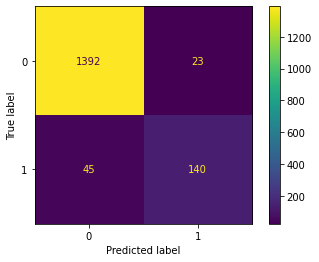

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybs_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

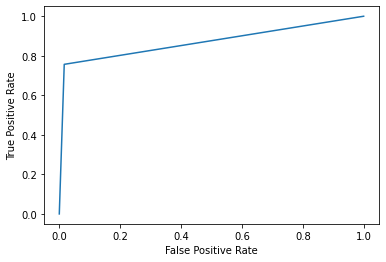

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(Yb1_test, Ybs_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

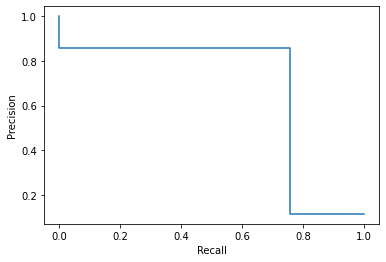

In [ ]:
# Precision Recall Display
prec, recall, _ = precision_recall_curve(Yb1_test, Ybs_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

HYBRID

In [ ]:
ensemble=VotingClassifier(estimators=[('QDA', qda), ('Bagging', bagging)], 
                       voting='hard', weights=[2,10]).fit(Xb1_train, Yb1_train)

In [ ]:
print('HYBRID-Accuracy-Kaggle-Binary: ',ensemble.score(Xb1_test, Yb1_test))

HYBRID-Accuracy-Kaggle-Binary:  0.963125


**BINARY CLASS KORATTUR DATASET**

In [ ]:
b1dataframe = pd.read_csv("Korattur_Binary.csv")
array = b1dataframe.values
Xb1 = array[:,0:9]
Yb1 = array[:,9]

In [ ]:
Xb1_train, Xb1_test, Yb1_train, Yb1_test = train_test_split(Xb1, Yb1, test_size=0.2, random_state=0)

PCA

In [ ]:
sc = StandardScaler()
Xbp_train = sc.fit_transform(Xb1_train)
Xbp_test = sc.transform(Xb1_test)

In [ ]:
pca = PCA(n_components = 2)

Xbp_train = pca.fit_transform(Xbp_train)
Xbp_test = pca.transform(Xbp_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
pca_classifier = LogisticRegression(random_state = 0)
pca_classifier.fit(Xbp_train, Yb1_train)

LogisticRegression(random_state=0)

In [ ]:
Ybp_pred = pca_classifier.predict(Xbp_test)
print("PCA-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybp_pred))

PCA-Accuracy-Kaggle-Binary:  0.876


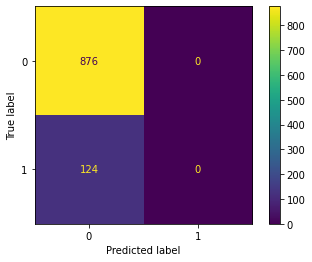

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybp_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

HCA

In [ ]:
data_scaled = normalize(b1dataframe)
data_scaled = pd.DataFrame(data_scaled, columns=b1dataframe.columns)

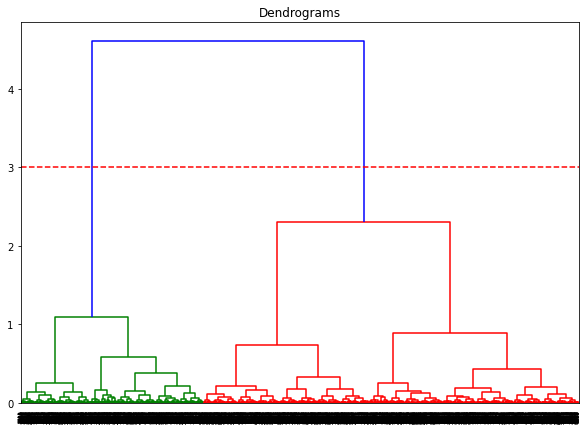

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
Ybh_pred = cluster.fit_predict(data_scaled)
print("HCA-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1, Ybh_pred))

HCA-Accuracy-Kaggle-Binary:  0.6147229445889177


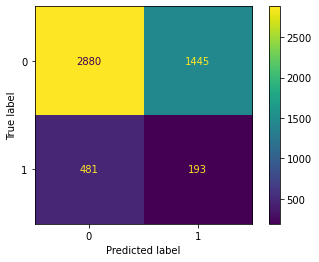

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1, Ybh_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

LDA

In [ ]:
Xb1l = sc.fit_transform(Xb1)

In [ ]:
lda = LDA(n_components=1)
lda.fit_transform(Xb1l, Yb1)

array([[ 1.70423291],
       [ 1.71420285],
       [ 0.91809231],
       ...,
       [ 1.56334924],
       [ 1.31810785],
       [-1.85316483]])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, Xb1l, Yb1, scoring='accuracy', cv=cv, n_jobs=-1)
print("LDA-Accuracy-Kaggle-Binary: ",np.mean(scores))

LDA-Accuracy-Kaggle-Binary:  0.9183826319305276


QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(Xb1, Yb1)

QuadraticDiscriminantAnalysis()

In [ ]:
scores = cross_val_score(qda, Xb1, Yb1, scoring='accuracy', cv=cv, n_jobs=-1)
print("QDA-Accuracy-Kaggle-Binary: ",np.mean(scores))  

QDA-Accuracy-Kaggle-Binary:  0.9519886439545758


BAGGING

In [ ]:
#specifying base classifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
bagging = BaggingClassifier(base_estimator=cart,n_estimators=num_trees, random_state=seed)

In [ ]:
bstart = time.time()
b_bagging_model = bagging.fit(Xb1_train,Yb1_train)
bend = time.time()
# total time taken
print(f"Runtime of the Bagging is {bend - bstart}")

Runtime of the Bagging is 0.5088884830474854


In [ ]:
Ybba_pred = b_bagging_model.predict(Xb1_test)
print("BAGGING-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybba_pred))

BAGGING-Accuracy-Kaggle-Binary:  1.0


In [ ]:
print("Precision-Recall-Fscore[binary] on test data:", precision_recall_fscore_support(Yb1_test, Ybba_pred, average='binary'))

Precision-Recall-Fscore[binary] on test data: (1.0, 1.0, 1.0, None)


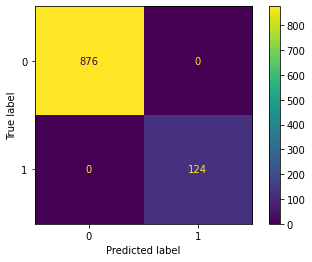

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybba_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

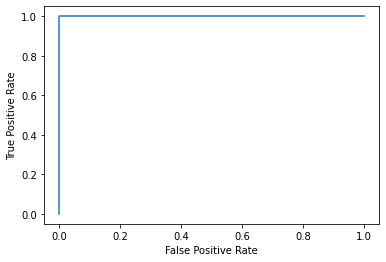

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(Yb1_test, Ybba_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

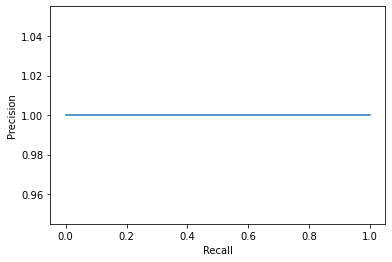

In [ ]:
# Precision Recall Display
prec, recall, _ = precision_recall_curve(Yb1_test, Ybba_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

BOOSTING

In [ ]:
# Defining the Adaboost model
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=0.5)

In [ ]:
bstart = time.time()
b_abc_model = abc.fit(Xb1_train, Yb1_train)
bend = time.time()
# total time taken
print(f"Runtime of the Adaboost is {bend - bstart}")

Runtime of the Adaboost is 0.06786346435546875


In [ ]:
Ybbo_pred = b_abc_model.predict(Xb1_test)
print("BOOSTING-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybbo_pred))

BOOSTING-Accuracy-Kaggle-Binary:  1.0


In [ ]:
print("Precision-Recall-Fscore[binary] on test data:", precision_recall_fscore_support(Yb1_test, Ybbo_pred, average='binary'))

Precision-Recall-Fscore[binary] on test data: (1.0, 1.0, 1.0, None)


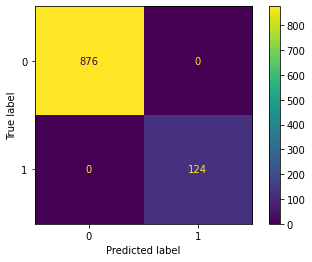

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybbo_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

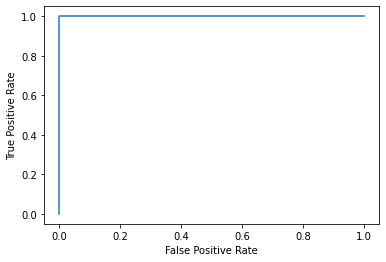

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(Yb1_test, Ybbo_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

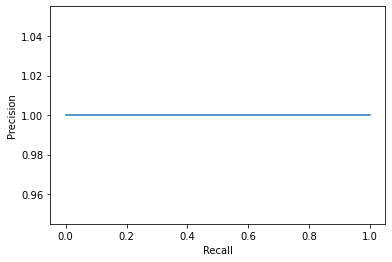

In [ ]:
# Precision Recall Display
prec, recall, _ = precision_recall_curve(Yb1_test, Ybbo_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

STACKING

In [ ]:
# Specifying base classifiers
qda = QuadraticDiscriminantAnalysis()
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
clf = [('qda', qda),('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)]
lr = LogisticRegression()
stacking = StackingClassifier(estimators = clf,final_estimator = lr)

In [ ]:
bstart = time.time()
b_stacking_model = stacking.fit(Xb1_train, Yb1_train)
bend = time.time()
# total time taken
print(f"Runtime of the Stacking is {bend - bstart}")

Runtime of the Stacking is 3.512162923812866


In [ ]:
Ybs_pred = b_stacking_model.predict(Xb1_test)
print("STACKING-Accuracy-Kaggle-Binary: ", metrics.accuracy_score(Yb1_test, Ybs_pred))

STACKING-Accuracy-Kaggle-Binary:  1.0


In [ ]:
print("Precision-Recall-Fscore[binary] on test data:", precision_recall_fscore_support(Yb1_test, Ybs_pred, average='binary'))

Precision-Recall-Fscore[binary] on test data: (1.0, 1.0, 1.0, None)


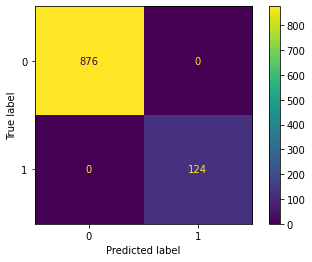

In [ ]:
# Confusion Matrix
cm = confusion_matrix(Yb1_test, Ybs_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

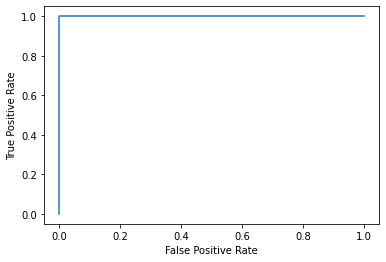

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(Yb1_test, Ybs_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

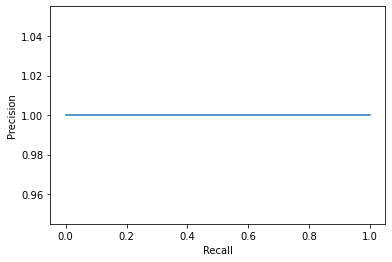

In [ ]:
# Precision Recall Display
prec, recall, _ = precision_recall_curve(Yb1_test, Ybs_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

HYBRID

In [ ]:
ensemble=VotingClassifier(estimators=[('QDA', qda), ('Bagging', bagging)], 
                       voting='hard', weights=[2,10]).fit(Xb1_train, Yb1_train)

In [ ]:
print('HYBRID-Accuracy-Kaggle-Binary: ',ensemble.score(Xb1_test, Yb1_test))

HYBRID-Accuracy-Kaggle-Binary:  1.0


**3 CLASS KORATTUR DATA**

In [ ]:
mdataframe = pd.read_csv("Korattur_Multi_3.csv")
array = mdataframe.values
Xm1 = array[:,0:9]
Ym1 = array[:,9]

In [ ]:
Xm1_train, Xm1_test, Ym1_train, Ym1_test = train_test_split(Xm1, Ym1, test_size=0.2, random_state=0)

PCA

In [ ]:
Xmp_train = sc.fit_transform(Xm1_train)
Xmp_test = sc.transform(Xm1_test)

In [ ]:
Xmp_train = pca.fit_transform(Xmp_train)
Xmp_test = pca.transform(Xmp_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
pca_classifier = LogisticRegression(random_state = 0)
pca_classifier.fit(Xmp_train, Ym1_train)
Ymp_pred = pca_classifier.predict(Xmp_test)
print("PCA-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Ymp_pred))

PCA-Accuracy-Korattur-3class:  0.7608481262327417


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Ymp_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (0.6612546302977823, 0.7608481262327417, 0.6967797940177318, None)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


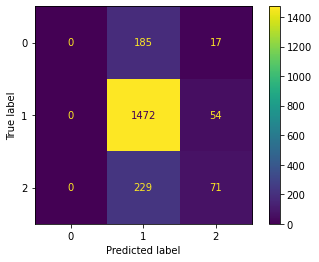

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Ymp_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

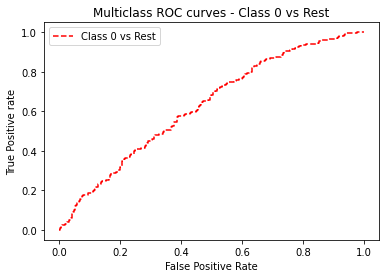

In [ ]:
#ROC curve
n_class = 3
Ym_pred_prob = pca_classifier.predict_proba(Xmp_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

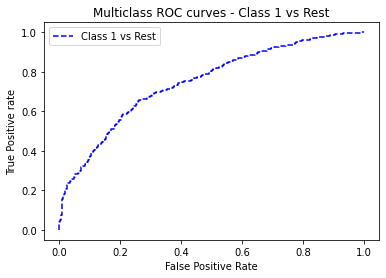

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

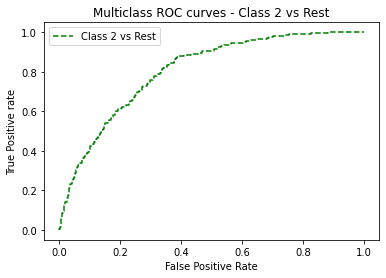

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

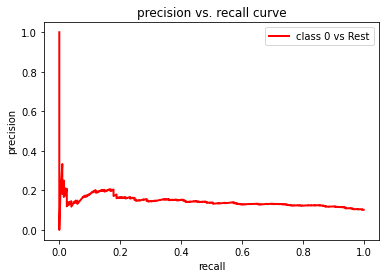

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:,i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

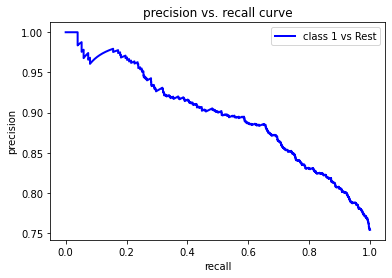

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

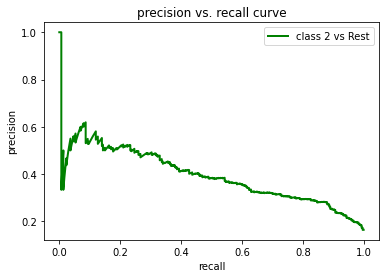

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

HCA

In [ ]:
data_scaled = normalize(mdataframe)
data_scaled = pd.DataFrame(data_scaled, columns=mdataframe.columns)

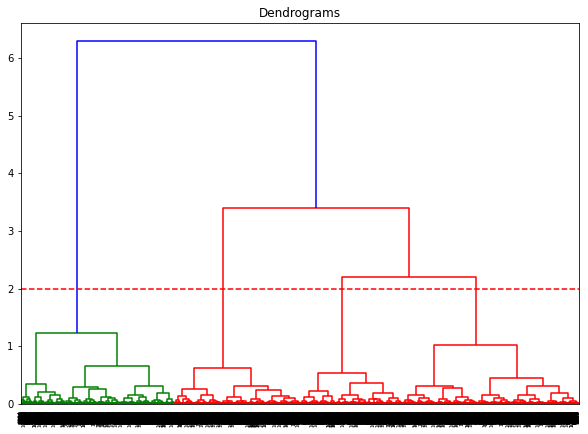

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2.5, color='r', linestyle='--')
plt.savefig('Dendograms-3 class korattur data ',dpi=300)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
Ymh_pred = cluster.fit_predict(data_scaled)

In [ ]:
print("HCA-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1, Ymh_pred))

HCA-Accuracy-Korattur-3class:  0.2757940422173999


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1, Ymh_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (0.6443000257413941, 0.2757940422173999, 0.3586932190788246, None)


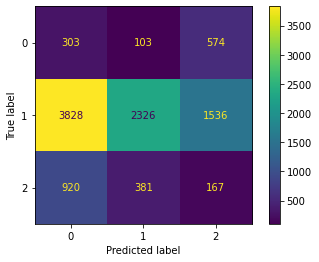

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1, Ymh_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

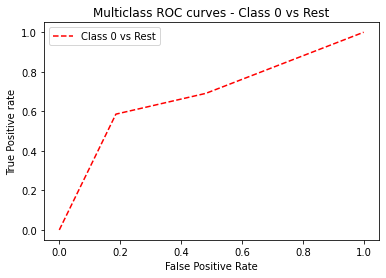

In [ ]:
#ROC curve
n_class = 3
#Ym_pred_prob = cluster.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1, Ymh_pred, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

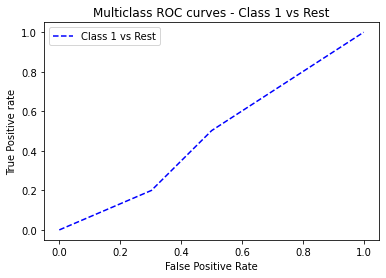

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

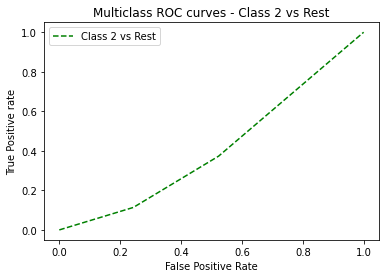

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

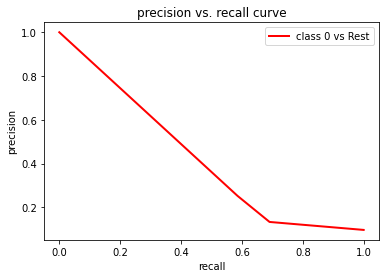

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1,
                                                        Ymh_pred, pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

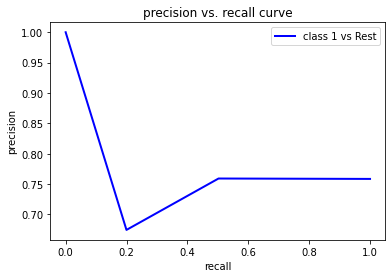

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

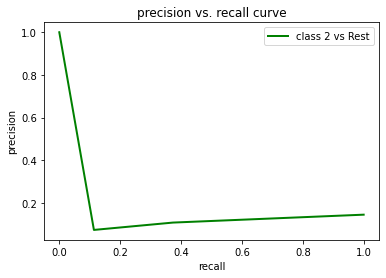

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

LDA

In [ ]:
Xm1l = sc.fit_transform(Xm1)

In [ ]:
lda.fit_transform(Xm1, Ym1)

array([[ 2.16155622],
       [-1.51038538],
       [-0.11997001],
       ...,
       [-1.01912344],
       [-1.79678962],
       [-1.12729684]])

In [ ]:
scores = cross_val_score(lda, Xm1, Ym1, scoring='accuracy', cv=cv, n_jobs=-1)
print("LDA-Accuracy-Korattur-3class: ", np.mean(scores))

LDA-Accuracy-Korattur-3class:  0.9231618804327436


QDA

In [ ]:
qda.fit(Xm1, Ym1)

QuadraticDiscriminantAnalysis()

In [ ]:
scores = cross_val_score(qda, Xm1, Ym1, scoring='accuracy', cv=cv, n_jobs=-1)
print("QDA-Accuracy-Korattur-3class: ",np.mean(scores))

QDA-Accuracy-Korattur-3class:  0.9510422690428765


BAGGING

In [ ]:
mstart = time.time()
m_bagging_model = bagging.fit(Xm1_train,Ym1_train)
mend = time.time()
# total time taken
print(f"Runtime of the Bagging is {mend - mstart}")

Runtime of the Bagging is 0.8876752853393555


In [ ]:
Ymba_pred = m_bagging_model.predict(Xm1_test)
print("BAGGING-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Ymba_pred))

BAGGING-Accuracy-Korattur-3class:  1.0


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Ymba_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (1.0, 1.0, 1.0, None)


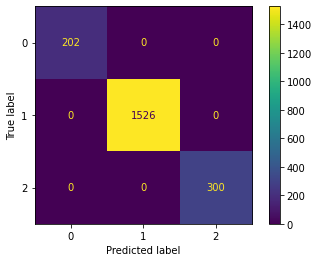

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Ymba_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

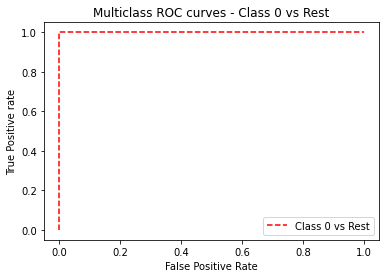

In [ ]:
#ROC curve
n_class = 3
Ym_pred_prob = m_bagging_model.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

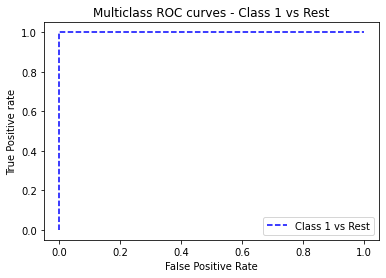

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

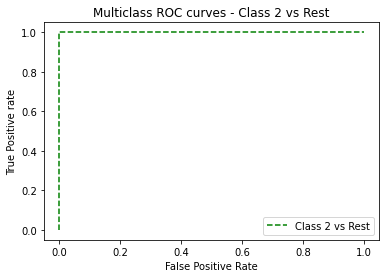

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

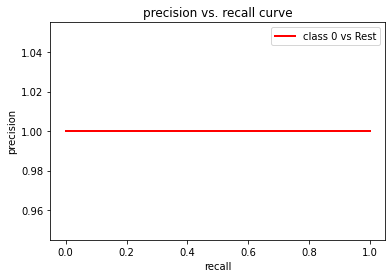

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:, i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

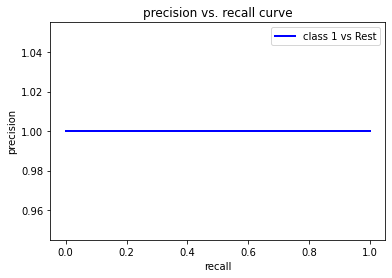

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

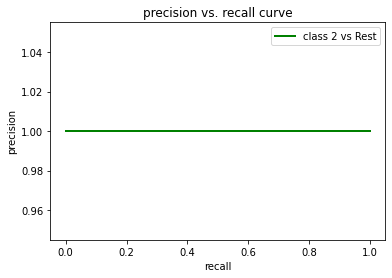

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

BOOSTING

In [ ]:
mstart = time.time()
m_abc_model = abc.fit(Xm1_train, Ym1_train)
mend = time.time()
# total time taken
print(f"Runtime of the Adaboost is {mend - mstart}")

Runtime of the Adaboost is 0.11247682571411133


In [ ]:
Ymbo_pred = m_abc_model.predict(Xm1_test)
print("BOOSTING-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Ymbo_pred))

BOOSTING-Accuracy-Korattur-3class:  1.0


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Ymba_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (1.0, 1.0, 1.0, None)


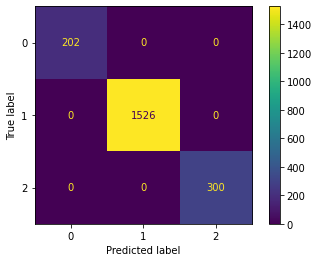

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Ymbo_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

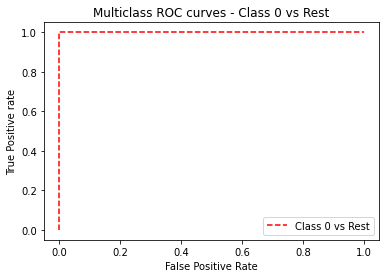

In [ ]:
#ROC curve
n_class = 3
Ym_pred_prob = m_abc_model.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

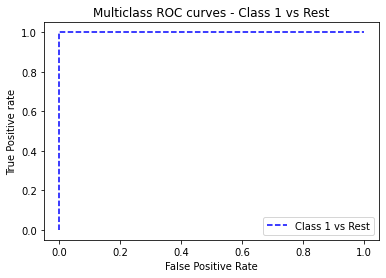

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

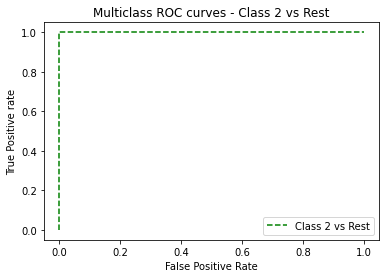

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

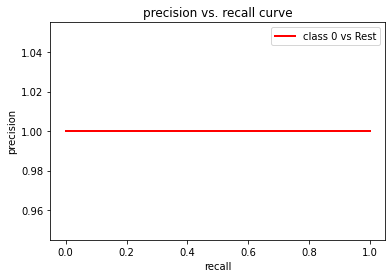

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:, i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

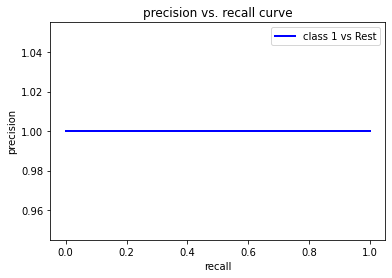

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

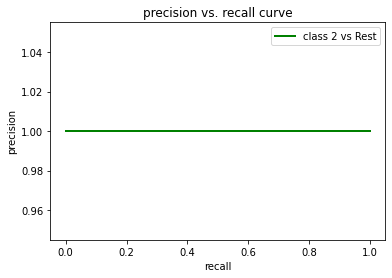

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

STACKING

In [ ]:
mstart = time.time()
m_stacking_model = stacking.fit(Xm1_train, Ym1_train)
mend = time.time()
# total time taken
print(f"Runtime of the Stacking is {mend - mstart}")

Runtime of the Stacking is 9.489271402359009


In [ ]:
Yms_pred = m_stacking_model.predict(Xm1_test)
print("STACKING-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Yms_pred))

STACKING-Accuracy-Korattur-3class:  1.0


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Yms_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (1.0, 1.0, 1.0, None)


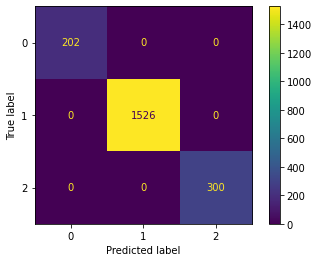

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Yms_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

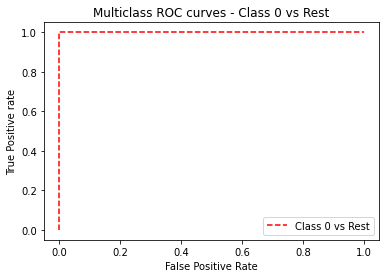

In [ ]:
#ROC curve
n_class = 3
Ym_pred_prob = m_stacking_model.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

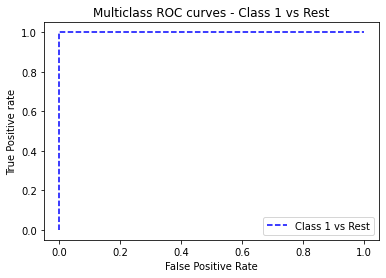

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

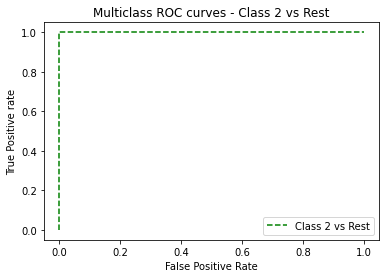

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

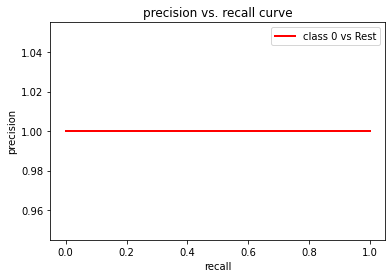

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:, i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

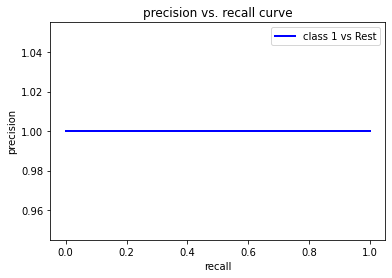

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

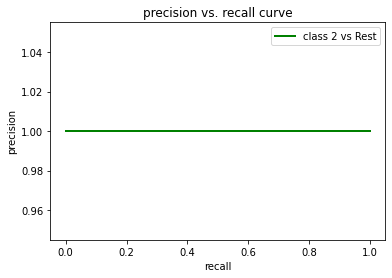

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
ensemble=VotingClassifier(estimators=[('QDA', qda), ('Bagging', bagging)], 
                       voting='hard', weights=[2,10]).fit(Xm1_train, Ym1_train)

In [ ]:
print('HYBRID-Accuracy-Korattur-3class: ',ensemble.score(Xm1_test, Ym1_test))

HYBRID-Accuracy-Korattur-3class:  1.0


**5 CLASS KORATTUR DATA**

In [ ]:
mdataframe = pd.read_csv("Korattur_Multi_5.csv")
array = mdataframe.values
Xm1 = array[:,0:9]
Ym1 = array[:,9]

In [ ]:
Xm1_train, Xm1_test, Ym1_train, Ym1_test = train_test_split(Xm1, Ym1, test_size=0.2, random_state=0)

PCA

In [ ]:
Xmp_train = sc.fit_transform(Xm1_train)
Xmp_test = sc.transform(Xm1_test)

In [ ]:
Xmp_train = pca.fit_transform(Xmp_train)
Xmp_test = pca.transform(Xmp_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
pca_classifier = LogisticRegression(random_state = 0)
pca_classifier.fit(Xmp_train, Ym1_train)
Ymp_pred = pca_classifier.predict(Xmp_test)
print("PCA-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Ymp_pred))

PCA-Accuracy-Korattur-3class:  0.7598039215686274


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Ymp_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (0.577301999231065, 0.7598039215686274, 0.6560980938336337, None)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


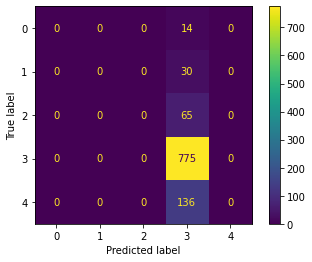

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Ymp_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

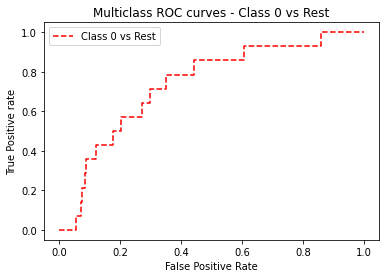

In [ ]:
#ROC curve
n_class = 5
Ym_pred_prob = pca_classifier.predict_proba(Xmp_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

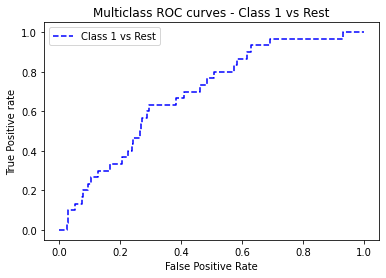

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

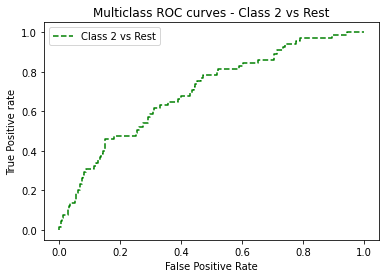

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

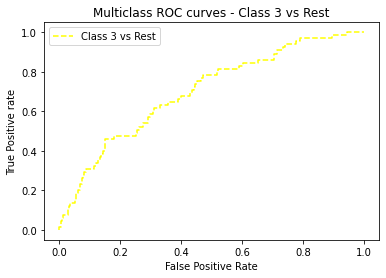

In [ ]:
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curves - Class 3 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

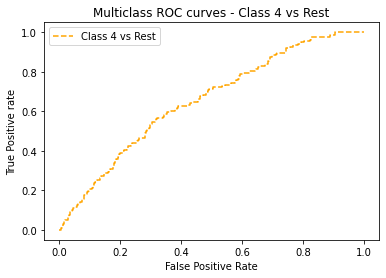

In [ ]:
plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Class 4 vs Rest')
plt.title('Multiclass ROC curves - Class 4 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

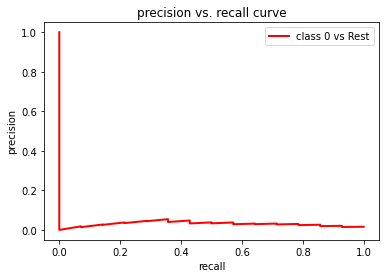

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:,i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

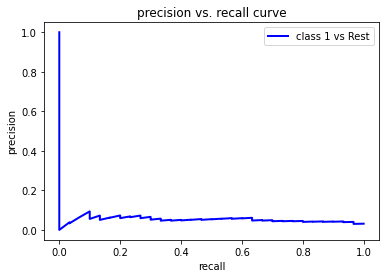

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

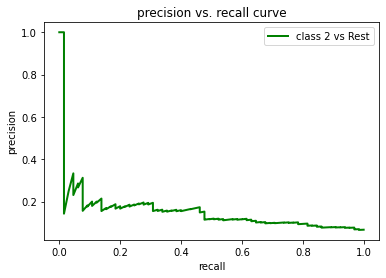

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

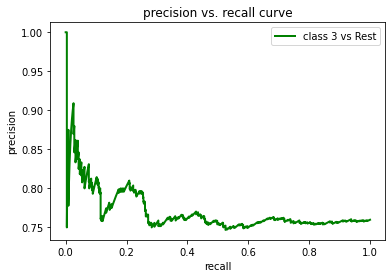

In [ ]:
plt.plot(recall[3], precision[3], lw=2,color='green', label='class 3 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

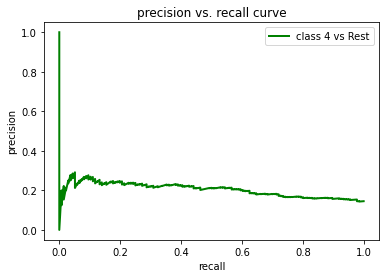

In [ ]:
plt.plot(recall[4], precision[4], lw=2,color='green', label='class 4 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

HCA

In [ ]:
data_scaled = normalize(mdataframe)
data_scaled = pd.DataFrame(data_scaled, columns=mdataframe.columns)

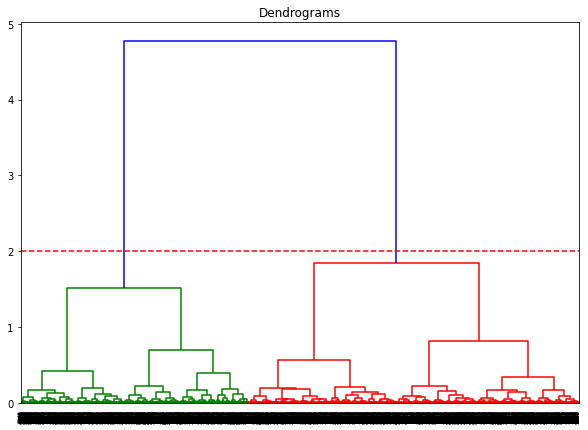

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.7, color='r', linestyle='--')
plt.savefig('Dendograms-5 class korattur data ',dpi=300)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
Ymh_pred = cluster.fit_predict(data_scaled)

In [ ]:
print("HCA-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1, Ymh_pred))

HCA-Accuracy-Korattur-3class:  0.22612276917042556


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1, Ymh_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (0.6049445051972516, 0.22612276917042556, 0.2675411161031088, None)


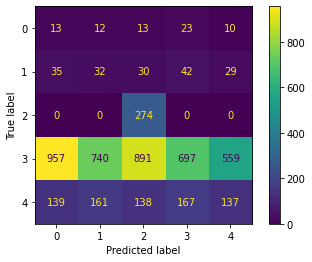

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1, Ymh_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

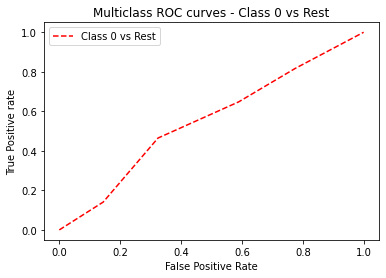

In [ ]:
#ROC curve
n_class = 5
#Ym_pred_prob = cluster.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1, Ymh_pred, pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

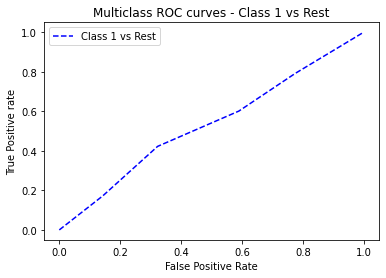

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

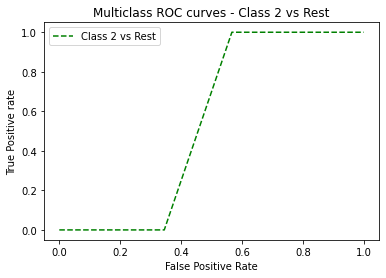

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

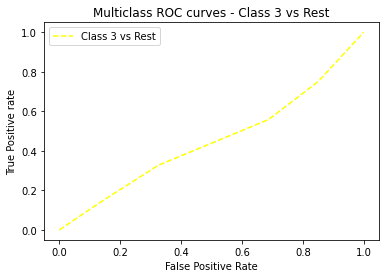

In [ ]:
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curves - Class 3 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

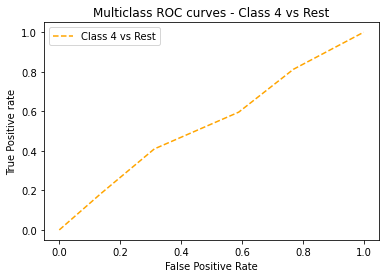

In [ ]:
plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Class 4 vs Rest')
plt.title('Multiclass ROC curves - Class 4 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

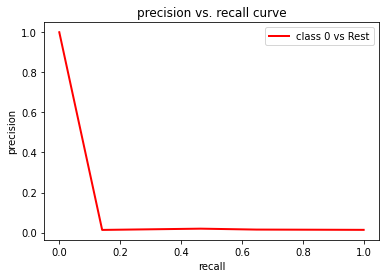

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1,
                                                        Ymh_pred, pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

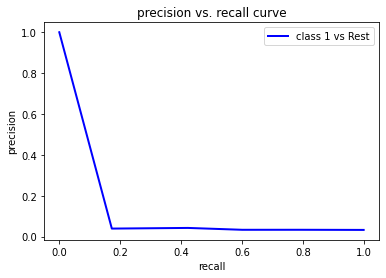

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

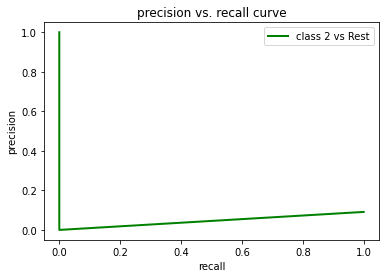

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

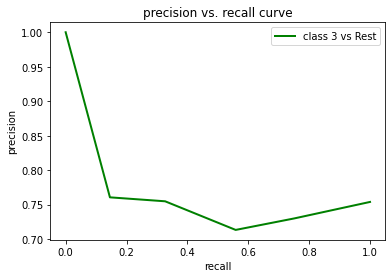

In [ ]:
plt.plot(recall[3], precision[3], lw=2,color='green', label='class 3 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

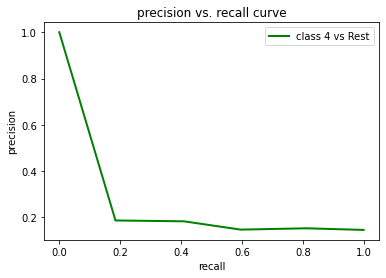

In [ ]:
plt.plot(recall[4], precision[4], lw=2,color='green', label='class 4 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

LDA

In [ ]:
Xm1l = sc.fit_transform(Xm1)

In [ ]:
lda.fit_transform(Xm1, Ym1)

array([[-2.33203112],
       [ 1.02649145],
       [ 0.6670911 ],
       ...,
       [-2.53550253],
       [ 1.12148701],
       [-0.74601872]])

In [ ]:
scores = cross_val_score(lda, Xm1, Ym1, scoring='accuracy', cv=cv, n_jobs=-1)
print("LDA-Accuracy-Korattur-3class: ", np.mean(scores))

LDA-Accuracy-Korattur-3class:  0.9427332845384385


QDA

In [ ]:
qda.fit(Xm1, Ym1)

QuadraticDiscriminantAnalysis()

In [ ]:
scores = cross_val_score(qda, Xm1, Ym1, scoring='accuracy', cv=cv, n_jobs=-1)
print("QDA-Accuracy-Korattur-3class: ",np.mean(scores))

QDA-Accuracy-Korattur-3class:  0.9695370905402106


BAGGING

In [ ]:
mstart = time.time()
m_bagging_model = bagging.fit(Xm1_train,Ym1_train)
mend = time.time()
# total time taken
print(f"Runtime of the Bagging is {mend - mstart}")

Runtime of the Bagging is 0.7993581295013428


In [ ]:
Ymba_pred = m_bagging_model.predict(Xm1_test)
print("BAGGING-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Ymba_pred))

BAGGING-Accuracy-Korattur-3class:  1.0


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Ymba_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (1.0, 1.0, 1.0, None)


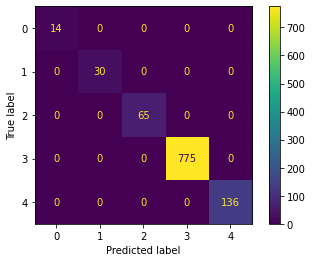

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Ymba_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

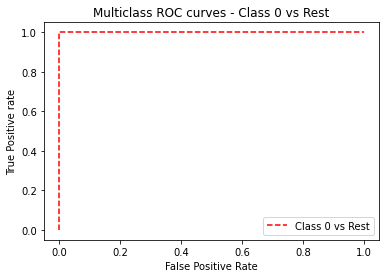

In [ ]:
#ROC curve
n_class = 5
Ym_pred_prob = m_bagging_model.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

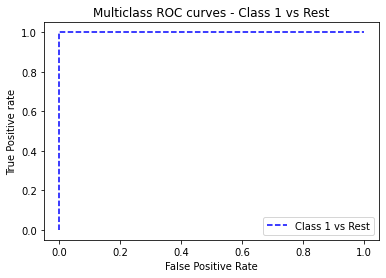

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

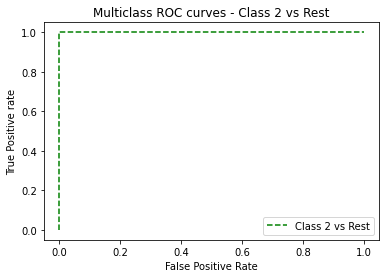

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

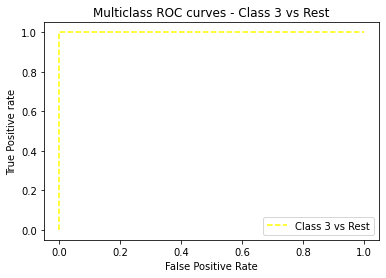

In [ ]:
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curves - Class 3 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

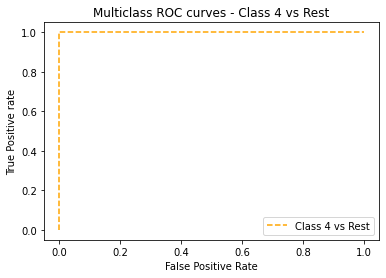

In [ ]:
plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Class 4 vs Rest')
plt.title('Multiclass ROC curves - Class 4 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

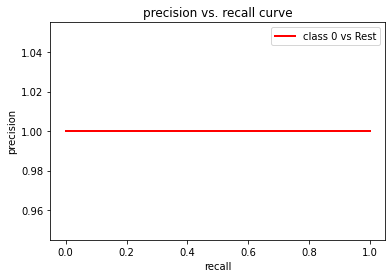

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:, i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

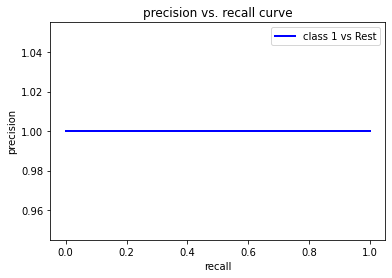

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

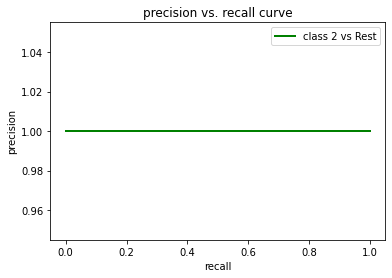

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

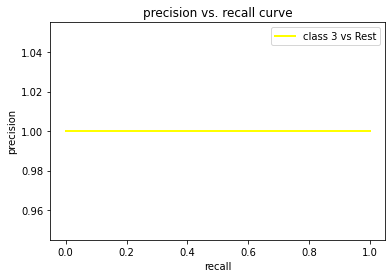

In [ ]:
plt.plot(recall[3], precision[3], lw=2,color='yellow', label='class 3 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

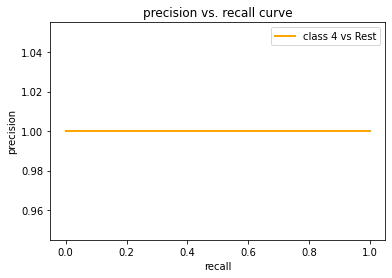

In [ ]:
plt.plot(recall[4], precision[4], lw=2,color='orange', label='class 4 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

BOOSTING

In [ ]:
mstart = time.time()
m_abc_model = abc.fit(Xm1_train, Ym1_train)
mend = time.time()
# total time taken
print(f"Runtime of the Adaboost is {mend - mstart}")

Runtime of the Adaboost is 0.07298755645751953


In [ ]:
Ymbo_pred = m_abc_model.predict(Xm1_test)
print("BOOSTING-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Ymbo_pred))

BOOSTING-Accuracy-Korattur-3class:  1.0


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Ymba_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (1.0, 1.0, 1.0, None)


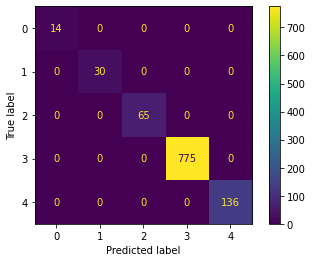

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Ymbo_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

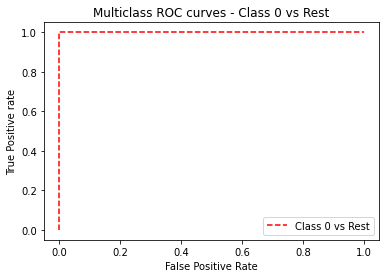

In [ ]:
#ROC curve
n_class = 5
Ym_pred_prob = m_abc_model.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

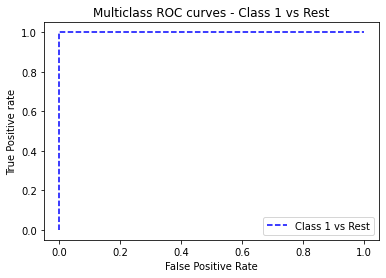

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

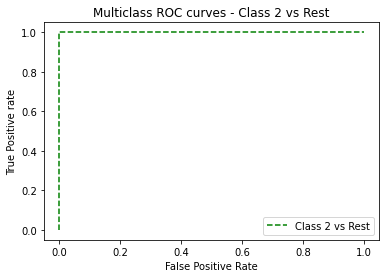

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

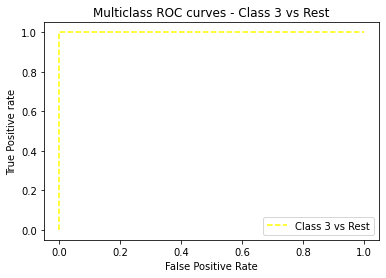

In [ ]:
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curves - Class 3 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

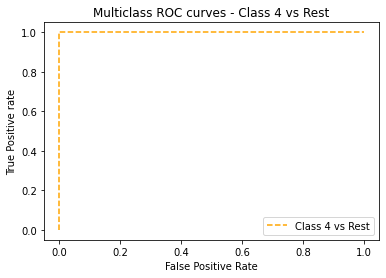

In [ ]:
plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Class 4 vs Rest')
plt.title('Multiclass ROC curves - Class 4 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

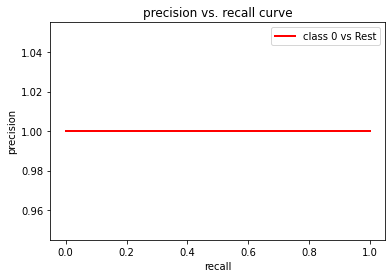

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:, i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

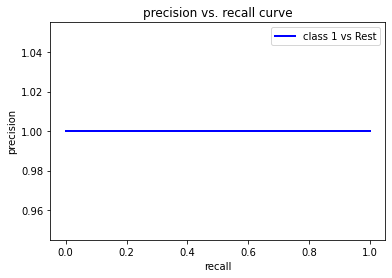

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

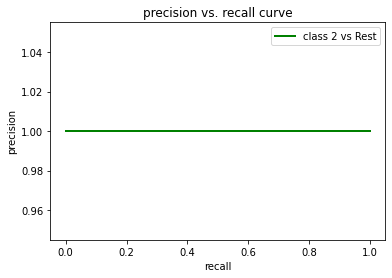

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

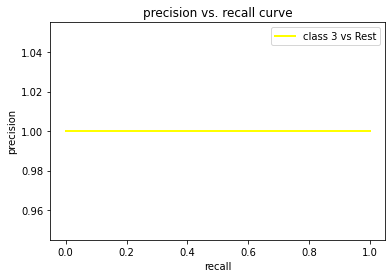

In [ ]:
plt.plot(recall[3], precision[3], lw=2,color='yellow', label='class 3 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

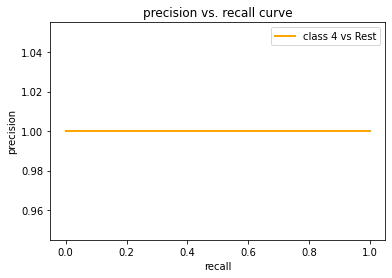

In [ ]:
plt.plot(recall[4], precision[4], lw=2,color='orange', label='class 4 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

STACKING

In [ ]:
mstart = time.time()
m_stacking_model = stacking.fit(Xm1_train, Ym1_train)
mend = time.time()
# total time taken
print(f"Runtime of the Stacking is {mend - mstart}")

Runtime of the Stacking is 6.8096935749053955


In [ ]:
Yms_pred = m_stacking_model.predict(Xm1_test)
print("STACKING-Accuracy-Korattur-3class: ", metrics.accuracy_score(Ym1_test, Yms_pred))

STACKING-Accuracy-Korattur-3class:  1.0


In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym1_test, Yms_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (1.0, 1.0, 1.0, None)


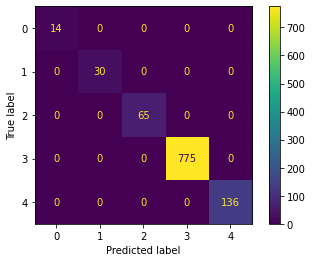

In [ ]:
#Confusion Matrix
cm = confusion_matrix(Ym1_test, Yms_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

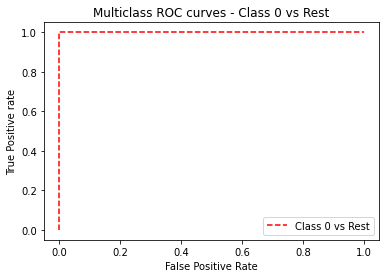

In [ ]:
#ROC curve
n_class = 5
Ym_pred_prob = m_stacking_model.predict_proba(Xm1_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym1_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

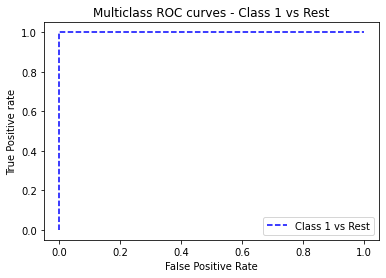

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

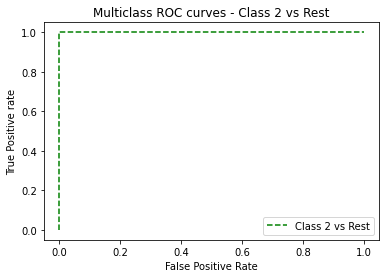

In [ ]:
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

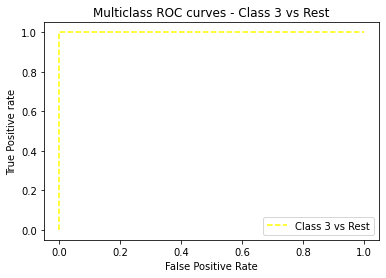

In [ ]:
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curves - Class 3 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

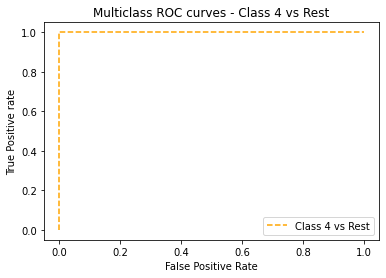

In [ ]:
plt.plot(fpr[4], tpr[4], linestyle='--',color='orange', label='Class 4 vs Rest')
plt.title('Multiclass ROC curves - Class 4 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

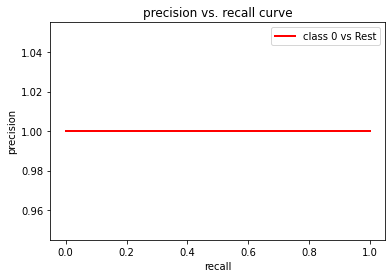

In [ ]:
#Precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(Ym1_test,
                                                        Ym_pred_prob[:, i], pos_label=i)
plt.plot(recall[0], precision[0], lw=2,color='red', label='class 0 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

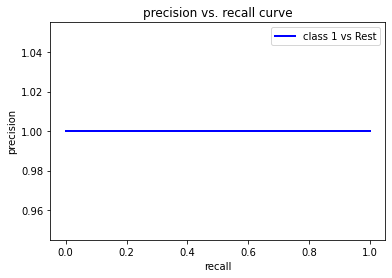

In [ ]:
plt.plot(recall[1], precision[1], lw=2,color='blue', label='class 1 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

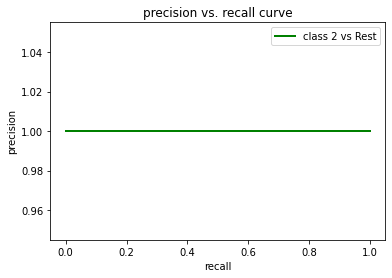

In [ ]:
plt.plot(recall[2], precision[2], lw=2,color='green', label='class 2 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

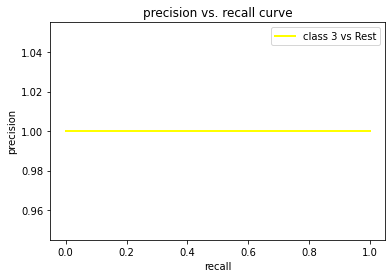

In [ ]:
plt.plot(recall[3], precision[3], lw=2,color='yellow', label='class 3 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

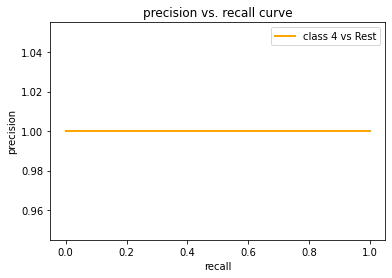

In [ ]:
plt.plot(recall[4], precision[4], lw=2,color='orange', label='class 4 vs Rest')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
ensemble=VotingClassifier(estimators=[('QDA', qda), ('Bagging', bagging)], 
                       voting='hard', weights=[2,10]).fit(Xm1_train, Ym1_train)

In [ ]:
print('HYBRID-Accuracy-Korattur-5class: ',ensemble.score(Xm1_test, Ym1_test))

HYBRID-Accuracy-Korattur-5class:  1.0
